In [660]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns; sns.set()
from io import StringIO 
from scipy.stats import shapiro
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
figsize = (16,8)
import statistics
from scipy.stats import skew

In [662]:
files = glob.glob('D:/Mohini/DataCollectionCleaning/Final/*.csv')
files

['D:/DataCollectionCleaning/Final\\2003.csv',
 'D:/DataCollectionCleaning/Final\\2004.csv',
 'D:/DataCollectionCleaning/Final\\2005.csv',
 'D:/DataCollectionCleaning/Final\\2006.csv',
 'D:/DataCollectionCleaning/Final\\2007.csv',
 'D:/DataCollectionCleaning/Final\\2008.csv',
 'D:/DataCollectionCleaning/Final\\2009.csv',
 'D:/DataCollectionCleaning/Final\\2010.csv',
 'D:/DataCollectionCleaning/Final\\2011.csv',
 'D:/DataCollectionCleaning/Final\\2012.csv',
 'D:/DataCollectionCleaning/Final\\2013.csv',
 'D:/DataCollectionCleaning/Final\\2014.csv',
 'D:/DataCollectionCleaning/Final\\2015.csv',
 'D:/DataCollectionCleaning/Final\\2016.csv']

In [808]:
df_all = pd.concat([pd.read_csv(f,encoding='Latin-1',  parse_dates=['datestop'], 
                                dayfirst=True, error_bad_lines=True, warn_bad_lines=True, skip_blank_lines=True,
                                low_memory=False) for f in files])

In [809]:
len(df_all)

5065145

In [110]:
len(df_all.columns)

38

In [109]:
df_all.head()

,ac_incid,age,arstmade,asltweap,build,crimsusp,cs_cloth,cs_descr,cs_drgtr,cs_objcs,...,rf_vcrim,riflshot,searched,ser_num,sex,timestop,typeofid,xcoord,ycoord,year
0,N,16,N,N,M,ROBBERY,N,N,N,N,...,Y,N,N,5,M,3:00,V,NaN,NaN,2003
1,N,15,N,N,M,ROBBERY,N,Y,N,N,...,Y,N,N,3,M,3:00,V,NaN,NaN,2003
2,N,39,N,N,M,CPW,N,Y,N,N,...,N,N,N,1406,M,3:00,V,NaN,NaN,2003
3,N,20,N,N,Z,BURGLARY,N,Y,N,N,...,N,N,N,4,F,16:00,R,NaN,NaN,2003
4,N,19,N,N,T,ROBBERY,N,Y,N,N,...,N,N,N,999991,M,3:35,P,NaN,NaN,2003


In [7]:
#Create a second DataFrame containing the columns in the df1 (nypd stop and frisk) DataFrame and print the DataFrame to see the contents
columns = pd.DataFrame(list(df_all.columns.values))
columns

,0
0,ac_incid
1,age
2,arstmade
3,asltweap
4,build
5,crimsusp
6,cs_cloth
7,cs_descr
8,cs_drgtr
9,cs_objcs


In [16]:
#Creating a DataFrame of the data type of each column and print the DataFrame to see the contents 
data_types = pd.DataFrame(df_all.dtypes,columns=['Data Type']) 

data_types 

,Data Type
ac_incid,object
age,object
arstmade,object
asltweap,object
build,object
crimsusp,object
cs_cloth,object
cs_descr,object
cs_drgtr,object
cs_objcs,object


In [17]:
#creating a DataFrame with the count of missing values in each column and print the DataFrame to see the contents 

missing_data_counts = pd.DataFrame(df_all.isnull().sum(),columns=['Missing Values']) 

missing_data_counts

,Missing Values
ac_incid,0
age,203
arstmade,0
asltweap,0
build,0
crimsusp,1001
cs_cloth,0
cs_descr,0
cs_drgtr,0
cs_objcs,0


In [18]:
#creating a DataFrame with the count of present values in each column and printing the DataFrame to see the contents 

present_data_counts = pd.DataFrame(df_all.count(), columns=['Present Values']) 

present_data_counts 

,Present Values
ac_incid,5065145
age,5064942
arstmade,5065145
asltweap,5065145
build,5065145
crimsusp,5064144
cs_cloth,5065145
cs_descr,5065145
cs_drgtr,5065145
cs_objcs,5065145


In [19]:
#creating a DataFrame with the count of unique values in each column and print the DataFrame to see the contents 

unique_value_counts = pd.DataFrame(columns=['Unique Values']) 

for v in list(df_all.columns.values):
    unique_value_counts.loc[v] = [df_all[v].nunique()]

In [20]:
unique_value_counts

,Unique Values
ac_incid,4
age,630
arstmade,3
asltweap,4
build,6
crimsusp,79073
cs_cloth,4
cs_descr,4
cs_drgtr,4
cs_objcs,4


In [21]:
#Merging all the DataFrames together by the index: 

data_quality_report = data_types.join(present_data_counts). join(missing_data_counts).join(unique_value_counts)

In [22]:
data_quality_report

,Data Type,Present Values,Missing Values,Unique Values
ac_incid,object,5065145,0,4
age,object,5064942,203,630
arstmade,object,5065145,0,3
asltweap,object,5065145,0,4
build,object,5065145,0,6
crimsusp,object,5064144,1001,79073
cs_cloth,object,5065145,0,4
cs_descr,object,5065145,0,4
cs_drgtr,object,5065145,0,4
cs_objcs,object,5065145,0,4


In [810]:
df_all['year'] = str(df_all['year'])#converting column year into object type
df_all['pct'] = str(df_all['pct'])#converting column pct into object type
df_all['ser_num'] = str(df_all['ser_num'])#converting column ser_num into object type

In [811]:
#using the describe function to generate summary stats for the entire dataset: 

df_all.describe() 

,perobs
count,5.054594e+06
mean,2.629857e+00
std,7.310114e+00
min,-3.000000e+01
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.990000e+02


In [ ]:
# Data Cleaning Process below

In [ ]:
#removing value '**' from the column age.

#df_all = df_all[df_all.age != '**']

In [812]:
#removing character values '**' and spaces from the column age.
df_all = df_all[df_all.age != '**']
df_all = df_all[df_all.age != " "]

In [813]:
#coverting column "age" into numeric
df_all['age'] = pd.to_numeric(df_all['age'])

In [814]:
df_all.age.dtype

dtype('float64')

In [815]:
#removing character values '**' and spaces from the column perstop.
df_all = df_all[df_all.perstop != '**']
df_all = df_all[df_all.perstop != " "]

In [816]:
#coverting column "perstop" into numeric
df_all['perstop'] = pd.to_numeric(df_all['perstop'])
df_all.perstop.dtype

dtype('int64')

In [407]:
#Overview of column race before cleaning and merging the values the column race
pd.value_counts(df_all['race'])

B    2623705
Q    1232818
W     501863
P     310630
Z     194229
A     156146
U      22881
I      19979
X       2137
         164
Name: race, dtype: int64

In [817]:
# Removing the blanks in column race and merging the values U, X and Z to 
df_all = df_all[pd.notnull(df_all['race'])]; df_all.race.replace('U','Z', inplace=True); df_all.race.replace('X','Z', inplace=True)
df_all.race.value_counts()

B    2623705
Q    1232818
W     501863
P     310630
Z     219247
A     156146
I      19979
         164
Name: race, dtype: int64

In [818]:
#also replacing the blank values with other (Z)
df_all.race.replace(' ', 'Z', inplace=True)
df_all.race.value_counts()

B    2623705
Q    1232818
W     501863
P     310630
Z     219411
A     156146
I      19979
Name: race, dtype: int64

In [299]:
#sex column before processing
df_all.sex.value_counts()

M    4569748
F     353366
Z     141274
         164
Name: sex, dtype: int64

In [819]:
#sex column after processing
#replacing the blank values with other (Z)
df_all.sex.replace(' ', 'Z', inplace=True)
df_all.sex.value_counts()

M    4569748
F     353366
Z     141438
Name: sex, dtype: int64

In [412]:
#haircolor column before processing
df_all.haircolr.value_counts()

BK    3717617
BR    1032998
BL      86450
BA      70395
XX      47059
GY      46685
ZZ      30768
SP      22270
RA       5253
RD       1672
WH       1423
DY        904
SN        806
          164
FR         88
Name: haircolr, dtype: int64

In [820]:
#haircolor column after processing
#replacing the blank values with other (ZZ)
df_all.haircolr.replace(' ', 'ZZ', inplace=True)
#Merging categories 'XX' and 'ZZ' into one as other
df_all.haircolr.replace('XX', 'ZZ', inplace=True)
#df_all = df_all[df_all.haircolr !=' ']
df_all.haircolr.value_counts()

BK    3717617
BR    1032998
BL      86450
ZZ      77991
BA      70395
GY      46685
SP      22270
RA       5253
RD       1672
WH       1423
DY        904
SN        806
FR         88
Name: haircolr, dtype: int64

In [414]:
#build column before processing
df_all.build.value_counts()

M    2951963
T    1587817
H     426327
Z      80515
U      17765
         165
Name: build, dtype: int64

In [821]:
#build column after processing
#replacing the blank values with other (Z)
df_all.build.replace(' ', 'Z', inplace=True)
df_all.build.value_counts()

M    2951963
T    1587817
H     426327
Z      80680
U      17765
Name: build, dtype: int64

In [530]:
#type of Id column before processing
df_all.typeofid.value_counts()

P    2686528
V    2163579
R     109473
O      85755
       19217
Name: typeofid, dtype: int64

In [822]:
#type of id after processing
#replacing the blanks with other (O)
df_all.typeofid.replace(' ', 'O', inplace=True)
df_all.typeofid.value_counts()

P    2686528
V    2163579
R     109473
O     104972
Name: typeofid, dtype: int64

In [823]:
#cleaning column timestop
# removing the semicolon and period from the timestop column
#df_all.timestop.replace(':','', inplace=True)
#df_all.timestop.replace('.','', inplace=True)
df_all['timestop'] = df_all['timestop'].replace({':':''}, regex = True)
df_all['timestop'] = df_all['timestop'].replace({'.':''}, regex = True)

In [824]:
#excluding scoord and ycoord columns from the dataframe
df_all = df_all.drop(['xcoord','ycoord'], axis=1)

In [825]:
#dropping the rows with missing values
df_all.dropna()

,ac_incid,age,arstmade,asltweap,build,crimsusp,cs_cloth,cs_descr,cs_drgtr,cs_objcs,...,rf_othsw,rf_vcact,rf_vcrim,riflshot,searched,ser_num,sex,timestop,typeofid,year
0,N,16.0,N,N,M,ROBBERY,N,N,N,N,...,N,N,Y,N,N,0 5\n1 3\n2 1...,M,,V,0 2003\n1 2003\n2 2003\n3...
1,N,15.0,N,N,M,ROBBERY,N,Y,N,N,...,N,N,Y,N,N,0 5\n1 3\n2 1...,M,,V,0 2003\n1 2003\n2 2003\n3...
2,N,39.0,N,N,M,CPW,N,Y,N,N,...,Y,N,N,N,N,0 5\n1 3\n2 1...,M,,V,0 2003\n1 2003\n2 2003\n3...
3,N,20.0,N,N,Z,BURGLARY,N,Y,N,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,F,,R,0 2003\n1 2003\n2 2003\n3...
4,N,19.0,N,N,T,ROBBERY,N,Y,N,N,...,Y,N,N,N,N,0 5\n1 3\n2 1...,M,,P,0 2003\n1 2003\n2 2003\n3...
5,N,0.0,N,N,M,CRIM TRESP.,N,Y,N,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,M,,P,0 2003\n1 2003\n2 2003\n3...
6,Y,50.0,N,N,M,BURGLARY,N,N,N,Y,...,N,N,N,N,N,0 5\n1 3\n2 1...,M,,P,0 2003\n1 2003\n2 2003\n3...
7,N,36.0,N,N,M,GLA,N,N,N,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,M,,R,0 2003\n1 2003\n2 2003\n3...
8,N,21.0,N,N,M,10-10 FIRC ARM,N,N,N,N,...,Y,N,N,N,N,0 5\n1 3\n2 1...,F,,P,0 2003\n1 2003\n2 2003\n3...
9,Y,16.0,N,N,T,CPW,Y,N,N,N,...,Y,N,N,N,N,0 5\n1 3\n2 1...,M,,R,0 2003\n1 2003\n2 2003\n3...


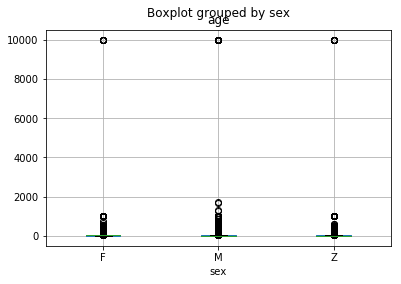

In [18]:
df_all.boxplot(column='age', by='sex')
plt.show()

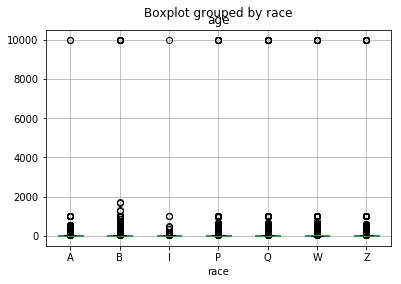

In [58]:
df_all.boxplot(column='age', by='race')
plt.show()

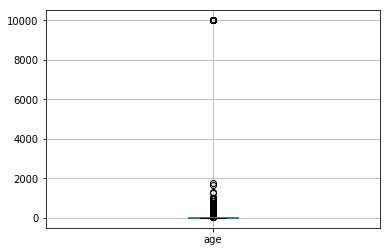

In [59]:
#Before applying cleaning process to the column age
df_all.boxplot(column='age', return_type='axes')

In [125]:
df_all['age'].describe()

count    5.064349e+06
mean     2.863626e+01
std      4.663321e+01
min      0.000000e+00
25%      1.900000e+01
50%      2.400000e+01
75%      3.400000e+01
max      9.999000e+03
Name: age, dtype: float64

In [826]:
#We can also see that there are values of age 10 and below which are again clearly an outlier
#Now, we remove the values below and equal to 10
#df_all = 
len(df_all[df_all.age <= 10])


54283

In [827]:
df_all = df_all[df_all.age > 10]

In [828]:
#we can see that there are values in age = 9999 (basically outlier), which need to handled by imputation
#We already removed the fields with character and spaces
#Now, we replace values above 100 with mean age
mean_age = int(df_all[df_all.age <=100].age.mean())
df_all.age = df_all.age.apply(lambda x: mean_age if x>100 else x)
df_all.age.value_counts()

20.0     301540
18.0     297959
19.0     296680
17.0     271395
21.0     254895
22.0     230908
16.0     225313
23.0     205865
24.0     189018
25.0     188864
26.0     159392
15.0     150316
27.0     144227
28.0     139840
30.0     127925
29.0     122641
31.0      97880
32.0      94040
33.0      83298
35.0      81963
34.0      79692
40.0      74531
36.0      71085
37.0      67648
39.0      66848
38.0      65916
14.0      65820
42.0      63411
41.0      61857
43.0      60489
          ...  
11.0       1318
71.0       1145
72.0       1124
73.0        924
74.0        694
75.0        648
76.0        553
77.0        400
78.0        361
79.0        283
80.0        226
100.0       202
81.0        149
82.0        116
83.0        105
84.0         86
85.0         76
87.0         46
88.0         39
86.0         37
90.0         36
91.0         25
89.0         24
93.0         20
92.0         16
94.0         16
95.0         15
97.0         15
96.0         14
98.0         14
Name: age, Length: 90, d

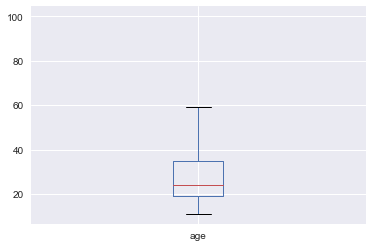

In [130]:
#boxplot after imputation and removing outliers
df_all.boxplot(column = 'age')

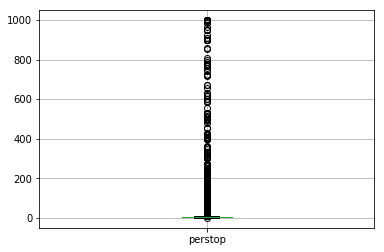

In [81]:
df_all.boxplot(column='perstop')

In [847]:
#cleaning column period of stop
#Period of stop is in minutes and we can see from the above plot that the values are upto 1000 which is approximately 16 hours. 
#which is definitely an outlier, hence we restrict the values in period of stop between 3 and 120 minutes
#Clearly there are some outliers.
df_all = df_all[df_all.perstop <=120]
#df_all = df_all[df_all.perstop > 3]

In [848]:
k = df_all['perstop'].value_counts()
k

5      2101483
7      1123718
10      616578
3       584566
4       190141
15      113038
6        68747
8        65063
20       50567
30       15643
9        12942
12       10469
25        7261
11        5520
13        4834
14        2945
60        2702
40        2446
18        2069
45        1992
16        1951
17        1729
35        1274
19        1091
22         791
23         729
50         700
21         619
24         511
120        497
        ...   
81           8
72           8
66           8
76           7
64           7
69           6
68           5
67           5
98           4
79           4
62           4
83           4
102          3
77           3
113          3
112          3
93           3
71           3
109          3
114          2
117          2
103          2
86           2
91           2
107          1
104          1
97           1
94           1
84           1
61           1
Name: perstop, Length: 113, dtype: int64

In [849]:
#Imputation of the column perstop (periood of stop)
mean_perstop = int(df_all[df_all.perstop > 3].perstop.mean())
df_all.perstop = df_all.perstop.apply(lambda x: mean_perstop if x<3 else x)

In [850]:
df_all.perstop.value_counts()

5      2101483
7      1123718
10      616578
3       584566
4       190141
15      113038
6        68747
8        65063
20       50567
30       15643
9        12942
12       10469
25        7261
11        5520
13        4834
14        2945
60        2702
40        2446
18        2069
45        1992
16        1951
17        1729
35        1274
19        1091
22         791
23         729
50         700
21         619
24         511
120        497
        ...   
81           8
72           8
66           8
76           7
64           7
69           6
68           5
67           5
98           4
79           4
62           4
83           4
102          3
77           3
113          3
112          3
93           3
71           3
109          3
114          2
117          2
103          2
86           2
91           2
107          1
104          1
97           1
94           1
84           1
61           1
Name: perstop, Length: 113, dtype: int64

In [845]:
#k = df_all['perstop'].value_counts()
#k
#len(df_all)#5009559

In [836]:
#post processing
df_all.perstop.describe()

count    5.009559e+06
mean     6.575157e+00
std      4.852433e+00
min      3.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      3.000000e+02
Name: perstop, dtype: float64

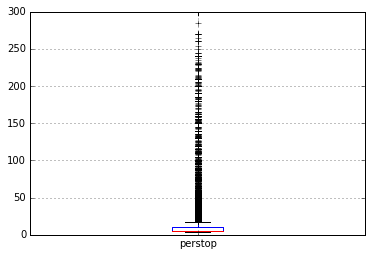

In [693]:
#post processing of column perstop
df_all.boxplot(column='perstop')

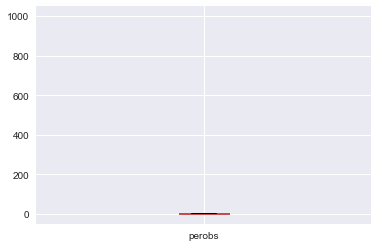

In [135]:
#before cleaning and processing 
df_all.boxplot(column='perobs')

In [503]:
#iqr = np.subtract(*np.percentile(df_all['age'], [75, 25]))
#q75, q25 = np.percentile(df_all.perobs.dropna(), [75 ,25])
#iqr = q75 - q25
#iqr
#min = q25 - (iqr*1.5)
#min
#max = q75 + (iqr*1.5)
##max

# identify outliers
#outliers = [x for x in df_all['perobs'] if x < min or x > max]
#print('Identified outliers: %d' % len(outliers))

#removing outliers
##outliers_removed = [x for x in df_all['perobs'] if x >= lower and x <= upper]
#print('Non-outlier observations: %d' % len(outliers_removed))

In [803]:

#df_all = df_all[df_all.perobs > 2]
#df_all.perobs.value_counts()

In [771]:
#cleaning column period of observation
#Period of observation is in minutes and we can se from the above plot that the values are upto 1000 which is approximately 16 hours. 
#which is definitely an outlier, hence we restrict the values in period of stop upto 600 minutes
#Clearly there are some outliers. Thus remove those greater than 10 hours (600 minutes).
#df_all = df_all[df_all.perobs <= 300]
#Imputation of the column perobs (periood of observation)

In [839]:
k = df_all['perobs'].value_counts()
k

1.00      2638207
2.00      1042214
5.00       630601
3.00       323597
10.00      133653
4.00        55831
15.00       28331
30.00       21962
0.00        21513
20.00       17535
7.00        15484
6.00        14797
8.00        12381
0.01         5571
0.30         4779
12.00        2888
0.02         2797
25.00        2519
0.10         2303
60.00        2041
9.00         1809
0.05         1719
45.00        1538
0.50         1508
11.00        1337
40.00        1136
0.20         1001
0.03          950
13.00         769
35.00         632
           ...   
0.99            1
94.00           1
93.00           1
545.00          1
2.10            1
86.00           1
584.00          1
121.00          1
0.38            1
187.00          1
154.00          1
183.00          1
181.00          1
501.00          1
179.00          1
175.00          1
173.00          1
165.00          1
156.00          1
511.00          1
129.00          1
149.00          1
147.00          1
146.00          1
144.00    

In [840]:
#Removing perobs with values greater than 600 minutes
df_all = df_all[df_all.perobs <=600]

In [842]:
#Imputation of the column perobs (periood of observation)
mean_perobs = int(df_all[df_all.perobs >= 3].perobs.mean())
df_all.perobs = df_all.perobs.apply(lambda x: mean_perobs if x<3 else x)
df_all.perobs.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


6.0      3738634
5.0       630601
3.0       323597
10.0      133653
4.0        55831
15.0       28331
30.0       21962
20.0       17535
7.0        15484
8.0        12381
12.0        2888
25.0        2519
60.0        2041
9.0         1809
45.0        1538
11.0        1337
40.0        1136
13.0         769
35.0         632
14.0         595
120.0        491
21.0         429
18.0         366
99.0         318
90.0         316
16.0         304
50.0         289
17.0         261
55.0         186
23.0         180
          ...   
131.0          1
173.0          1
129.0          1
128.0          1
121.0          1
117.0          1
108.0          1
97.0           1
94.0           1
165.0          1
175.0          1
248.0          1
211.0          1
241.0          1
238.0          1
237.0          1
231.0          1
226.0          1
213.0          1
212.0          1
209.0          1
179.0          1
208.0          1
207.0          1
195.0          1
194.0          1
187.0          1
183.0         

In [851]:
len(df_all)#5010066#4998218

4998218

In [852]:
df_all.perobs.describe()

count    4.998218e+06
mean     6.117323e+00
std      4.293059e+00
min      3.000000e+00
25%      6.000000e+00
50%      6.000000e+00
75%      6.000000e+00
max      5.840000e+02
Name: perobs, dtype: float64

In [30]:
#df_all = df_all[df_all.timestop != '']
##df_all = df_all[df_all.timestop != ' ']
#df_all[df_all.timestop.notnull()]

In [853]:
#dropping the rows with missing values
#replace any empty strings in the timestop column with np.nan objects, like so:
df_all['timestop'].replace('', np.nan, inplace=True)
#drop the null values:
df_all.dropna(subset=['timestop'], inplace=True)

In [854]:
#dropping the rows with missing values
#replace any empty strings in the premname column with np.nan objects, like so:
df_all['premname'].replace('', np.nan, inplace=True)

In [855]:
#drop the null values:
df_all.dropna(subset=['premname'], inplace=True)

In [856]:
#dropping the rows with missing values
#replace any empty strings in the crimsusp column with np.nan objects, like so:
df_all['crimsusp'].replace('', np.nan, inplace=True)
#drop the null values:
df_all.dropna(subset=['crimsusp'], inplace=True)

In [857]:
#creating a DataFrame and checking if still there is any misisng values 

missing_data_counts1 = pd.DataFrame(df_all.isnull().sum(),columns=['Missing Values']) 

missing_data_counts1 

,Missing Values
ac_incid,0
age,0
arstmade,0
asltweap,0
build,0
crimsusp,0
cs_cloth,0
cs_descr,0
cs_drgtr,0
cs_objcs,0


In [858]:
 #transposing the results provided by describe() to make the results more readable: 

df_all.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4170266.0,28.289379,12.096137,11.0,19.0,25.0,35.0,100.0
perobs,4170266.0,6.089140,4.075173,3.0,6.0,6.0,6.0,550.0
perstop,4170266.0,6.503417,4.264854,3.0,5.0,5.0,7.0,120.0
timestop,4170266.0,1419.122079,751.389963,0.0,953.0,1622.0,2040.0,2959.0


In [859]:
#finally, showing the mode of each column, and transpose it so we can read everything in IPython Notebook: 

df_all.mode().transpose()

,0
ac_incid,Y
age,20
arstmade,N
asltweap,N
build,M
crimsusp,FEL
cs_cloth,N
cs_descr,N
cs_drgtr,N
cs_objcs,N


In [861]:
#df['timestop'] = df['timestop'].replace({':':''}, regex = True)
#len(df_all)#5010066#3364249#825659#2851192

In [862]:
#using the quantile() method of the DataFrame, and specify the quantiles of the column "age" to see for the specified column: 

df_all['age'].quantile([.05, .1, .25, .5, .75, .9, .99])

0.05    16.0
0.10    17.0
0.25    19.0
0.50    25.0
0.75    35.0
0.90    46.0
0.99    63.0
Name: age, dtype: float64

In [863]:
#using the quantile() method of the DataFrame, and specify the quantiles of the column "perobs" to see for the specified column: 

df_all['perobs'].quantile([.05, .1, .25, .5, .75, .9, .99])

0.05     3.0
0.10     5.0
0.25     6.0
0.50     6.0
0.75     6.0
0.90     6.0
0.99    15.0
Name: perobs, dtype: float64

In [864]:
statistics.median(df_all['age'])

25.0

In [865]:
#using the quantile() method of the DataFrame, and specify the quantiles of the column "perstop" to see for the specified column: 

df_all['perstop'].quantile([.05, .1, .25, .5, .75, .9, .99])

0.05     3.0
0.10     3.0
0.25     5.0
0.50     5.0
0.75     7.0
0.90    10.0
0.99    20.0
Name: perstop, dtype: float64

In [866]:
#printing out the mean, median, mode, and range for the specified column of the DataFrame as follows: 

print("Mean: {}".format(df_all['age'].mean())) 
print("Median: {}".format(df_all['age']. median()))
print("Mode: {}".format(df_all['age'].mode()))

Mean: 28.289378902928494
Median: 25.0
Mode: 0    20.0
dtype: float64


In [867]:
#Using the groupby() and agg() methods of the DataFrame and showing the results:
#grouping by sex and aggregating age

sex_count = df_all.groupby('sex').agg({'age': np.mean}) 

sex_count

,age
sex,
F,29.097610
M,28.216094
Z,28.838287


In [868]:
#Using the groupby() and agg() methods of the DataFrame and showing the results:
#grouping by hair color and aggregating age
haircolr_count = df_all.groupby('haircolr').agg({'age': np.mean}) 
haircolr_count

,age
haircolr,
BA,36.423724
BK,27.777051
BL,28.435989
BR,27.601329
DY,31.201531
FR,49.480000
GY,53.899257
RA,28.538552
RD,29.171840


In [869]:
#grouping by race and aggregating age
race_count = df_all.groupby('race').agg({'age': np.mean}) 
race_count

,age
race,
A,28.191993
B,28.336418
I,28.398441
P,27.440408
Q,27.856388
W,29.508118
Z,28.811845


In [870]:
#grouping by build and aggregating age
build_count = df_all.groupby('build').agg({'age': np.mean}) 
build_count

,age
build,
H,31.634626
M,28.874928
T,26.201477
U,30.663789
Z,29.863060


In [449]:
df_all['age'].skew()

1.2322485832695829

In [106]:
df_all['perobs'].skew()

8.251640857783451

In [107]:
df_all['perstop'].skew()

6.942432329792516

In [164]:
df_all.corr()

,age,pct,perobs,perstop,ser_num,timestop,year
age,1.000000,-0.158568,0.027176,-0.032680,-0.025274,-0.037901,0.001103
pct,-0.158568,1.000000,-0.081727,0.030060,0.140585,0.028277,-0.021919
perobs,0.027176,-0.081727,1.000000,0.134252,-0.022580,-0.017494,0.011627
perstop,-0.032680,0.030060,0.134252,1.000000,-0.041905,-0.026094,0.017598
ser_num,-0.025274,0.140585,-0.022580,-0.041905,1.000000,0.015264,-0.063444
timestop,-0.037901,0.028277,-0.017494,-0.026094,0.015264,1.000000,-0.024045
year,0.001103,-0.021919,0.011627,0.017598,-0.063444,-0.024045,1.000000


In [342]:
df_all.cov()

,age,pct,perobs,perstop,ser_num,timestop,year
age,155.775270,-73.091091,2.524581,-2.126452,-1.415338e+03,-341.450593,0.030267
pct,-73.091091,1363.946112,-22.465448,5.787810,2.329606e+04,753.795929,-1.780165
perobs,2.524581,-22.465448,55.399544,5.209572,-7.541036e+02,-93.984801,0.190307
perstop,-2.126452,5.787810,5.209572,27.180314,-9.802495e+02,-98.194309,0.201753
ser_num,-1415.338252,23296.062062,-754.103586,-980.249544,2.013216e+07,49434.167987,-625.986537
timestop,-341.450593,753.795929,-93.984801,-98.194309,4.943417e+04,521009.877010,-38.166529
year,0.030267,-1.780165,0.190307,0.201753,-6.259865e+02,-38.166529,4.835755


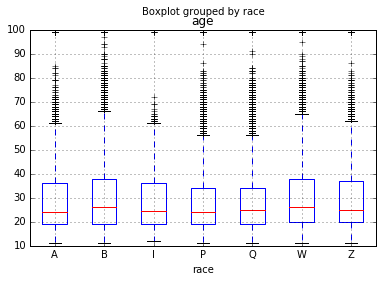

In [343]:
df_all.boxplot(column='age', by='race')
plt.show()

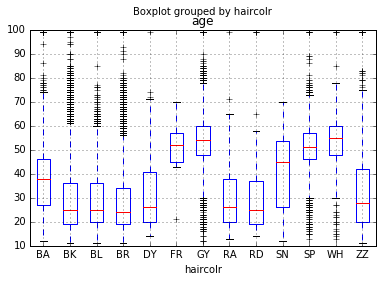

In [344]:
df_all.boxplot(column='age', by='haircolr')
plt.show()

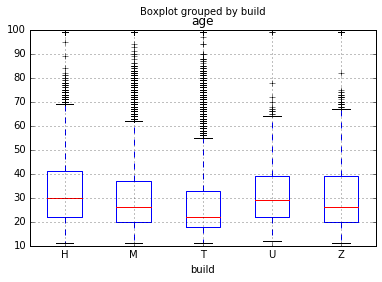

In [345]:
df_all.boxplot(column='age', by='build')
plt.show()

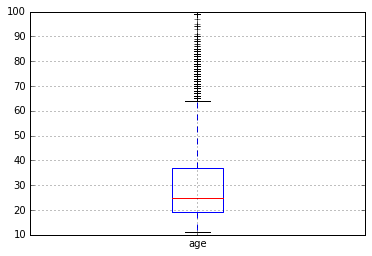

In [346]:
df_all.boxplot(column='age', return_type='axes')

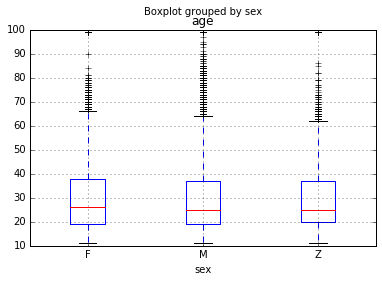

In [347]:
df_all.boxplot(column='age', by='sex')
plt.show()

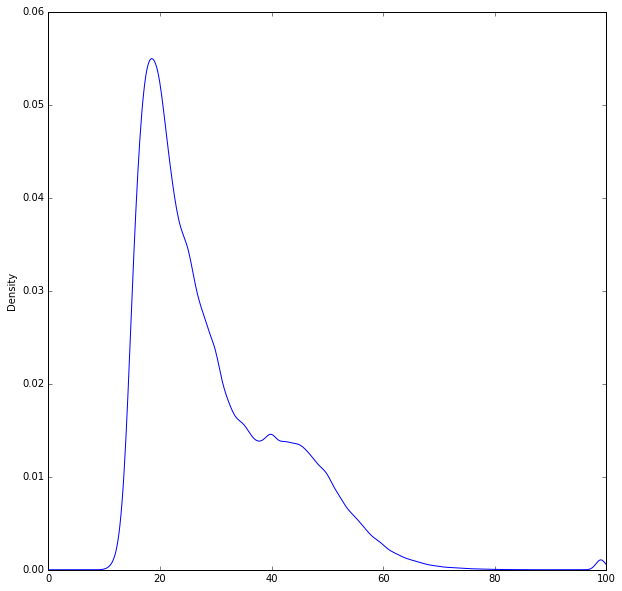

In [348]:
df_all['age'].plot(kind="density",
           figsize=(10,10),
            xlim=(0,100))

In [192]:
#iqr = np.subtract(*np.percentile(df_all['age'], [75, 25]))
q75, q25 = np.percentile(df_all.age.dropna(), [75 ,25])
iqr = q75 - q25
iqr

18.0

In [195]:
min = q25 - (iqr*1.5)
min

-8.0

In [194]:
max = q75 + (iqr*1.5)
max

64.0

In [198]:
# identify outliers
outliers = [x for x in df_all['age'] if x < min or x > max]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 5073


In [ ]:
# This help us to explore the data. It is not always necessary to remove the outliers. #
#The reason of that age column is having outliers above age 64 is because of the fact that there will always be
#lesser number of old people stopped than people between 20 - 64 years old
#As age between 64 to 100 cannot be considered outliers and thus we do not remove from the data

In [ ]:
#removing outliers
#outliers_removed = [x for x in df_all['age'] if x >= lower and x <= upper]
#print('Non-outlier observations: %d' % len(outliers_removed))

In [871]:
statistics.stdev(df_all['age'])

12.096136613189513

In [720]:
#len(df_all)#

In [872]:
#replacing values for race
df_all['race'].replace({'A':'ASIAN','B':'BLACK','I':'NATIVE INDIAN','P':'B-HISPANIC','Q':'W-HISPANIC','W':'WHITE','Z':'OTHER'}, inplace=True)

In [873]:

df_all['build'].replace({'H':'HEAVY', 'M':'MEDIUM', 'T':'THIN', 'U': 'MUSCULAR', 'Z': 'UNKNOWN'}, inplace=True)
df_all['haircolr'].replace({'BA':'BALD','BK':'BLACK','BL':'BLOND','BR':'BROWN','DY':'DYED','FR':'FROSTED','GY':'GRAY','RD':'RED','SN':'SANDY','SP':'SALT AND PEPPER','WH':'WHITE','ZZ':'OTHER'}, inplace=True)
df_all['sex'].replace({'M':'Male','F':'Female','Z':'Other'}, inplace=True)


In [880]:
#Research Questions

In [877]:
#Question 1: Effectiveness of Stop and Frisk Program from 2003 to 2016?
var_effectiveness = df_all['arstmade'].value_counts()[1]/ df_all['arstmade'].size
var_effectiveness * 100

6.168767172165996

In [881]:
#Question 2:How many searches and frisks were conducted?
#total no of frisk cases
frisked = df_all['frisked'].value_counts()[1]
frisked

1914214

In [882]:
#question 2
#total no of searched cases
searched = df_all['searched'].value_counts()[1]
searched

364086

In [920]:
#Question 3: How many stops did result in tickets or arrests?
var_numberofArrests = df_all['arstmade'].value_counts()[1]
var_numberofArrests

257254

In [885]:
#question 4 arrest rate, frisked rate
def outcome_stats_computation(df):
    """Compute statistics regarding the relative quanties of arrests, searched, frisked"""
    total_stops = len(df)
    total_frisked = len(df[df['frisked'] == 'Y'])
    total_searched = len(df[df['searched'] == 'Y'])
    total_arrests = len(df[df['arstmade'] == 'Y'])
    frisked_rate = total_frisked / total_stops
    searched_rate = total_searched / total_stops
    arrest_rate = total_arrests / total_stops

    return(pd.Series(data = {
        'total_stops': total_stops,
        'total_frisked': total_frisked,
        'total_searched': total_searched,
        'total_arrests': total_arrests,
        'frisked_rate': frisked_rate,
        'searched_rate': searched_rate,
        'arrest_rate': arrest_rate
    }))

In [886]:
outcome_stats_computation(df_all)

arrest_rate       6.168767e-02
frisked_rate      5.409852e-01
searched_rate     8.730522e-02
total_arrests     2.572540e+05
total_frisked     2.256052e+06
total_searched    3.640860e+05
total_stops       4.170266e+06
dtype: float64

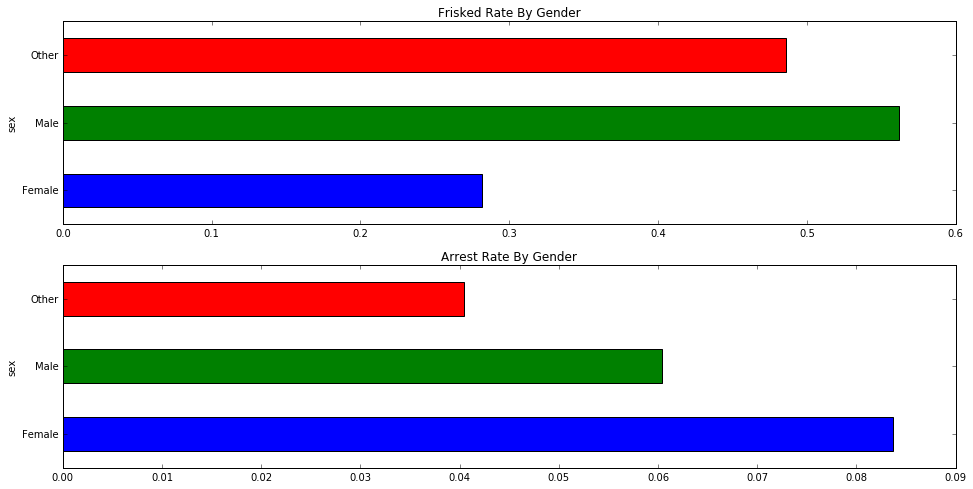

In [887]:
#Breakdown By Gender
#we can easily compare these stats for male and female suspects.
gender_agg = df_all.groupby('sex').apply(outcome_stats_computation)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
gender_agg['frisked_rate'].plot.barh(ax=axes[0], figsize=figsize, title="Frisked Rate By Gender")
gender_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Gender')

In [888]:
#Breakdown By Race.
race_agg = df_all.groupby('race').apply(outcome_stats_computation)
race_agg

,arrest_rate,frisked_rate,searched_rate,total_arrests,total_frisked,total_searched,total_stops
race,,,,,,,
ASIAN,0.064522,0.453871,0.085767,8458.0,59497.0,11243.0,131088.0
B-HISPANIC,0.068688,0.587940,0.093719,18078.0,154740.0,24666.0,263190.0
BLACK,0.060383,0.558668,0.085049,131772.0,1219169.0,185600.0,2182277.0
NATIVE INDIAN,0.050315,0.459790,0.076402,839.0,7667.0,1274.0,16675.0
OTHER,0.048313,0.487676,0.074681,6739.0,68024.0,10417.0,139486.0
W-HISPANIC,0.063359,0.559734,0.093058,64947.0,573767.0,95391.0,1025071.0
WHITE,0.064054,0.419871,0.086053,26421.0,173188.0,35495.0,412479.0


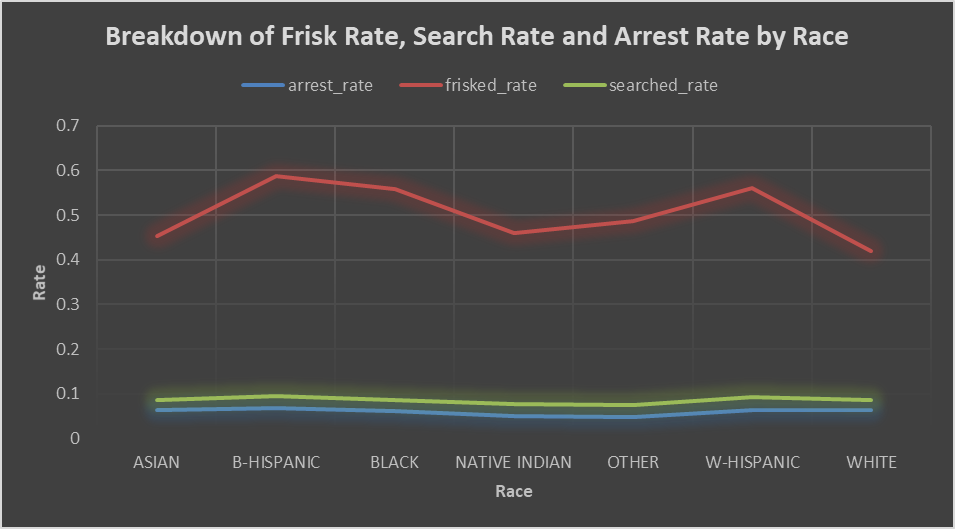

In [917]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/6.png')

In [578]:
#Breakdown By Year
year_agg = df_all.groupby('year').apply(outcome_stats_computation)
year_agg

,arrest_rate,frisked_rate,searched_rate,total_arrests,total_frisked,total_searched,total_stops
year,,,,,,,
2006,0.038219,0.429702,0.071637,4195.0,47165.0,7863.0,109762.0
2007,0.055855,0.534291,0.086660,5784.0,55328.0,8974.0,103554.0
2008,0.057462,0.544500,0.090475,6508.0,61669.0,10247.0,113258.0
2009,0.060316,0.578196,0.094536,7209.0,69106.0,11299.0,119520.0
2010,0.072930,0.551208,0.098242,8105.0,61258.0,10918.0,111134.0
2011,0.063758,0.536545,0.086502,7768.0,65370.0,10539.0,121835.0
2012,0.063751,0.527529,0.085891,6087.0,50369.0,8201.0,95481.0
2013,0.074360,0.558354,0.095200,2669.0,20041.0,3417.0,35893.0
2014,0.122413,0.660749,0.148660,1124.0,6067.0,1365.0,9182.0


In [891]:
#Question 4: Were there any evidence or instance of racial bias?
raceFrequency = pd.DataFrame(df_all['race'].value_counts())
raceFrequency.reset_index(inplace=True)
raceFrequency.columns = ['race','numberofStops']
#print(raceFrequency)

raceFrequencyfinal = pd.DataFrame(data=None, columns=['race','numberofStops','numberarrested'])

for i in range(0,len(raceFrequency)):
    numberarrested = df_all[(df_all['race'] == raceFrequency.iloc[i,0]) & (df_all['arstmade'] == 'Y')]
    raceFrequencyfinal = raceFrequencyfinal.append({'race':raceFrequency.iloc[i,0],'numberofStops': raceFrequency.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
raceFrequencyfinal['percentageofStops'] = 100 * raceFrequencyfinal['numberofStops']/raceFrequencyfinal['numberofStops'].sum()
raceFrequencyfinal['percentageofArrest'] = 100 * raceFrequencyfinal['numberarrested']/raceFrequencyfinal['numberofStops'].sum()

raceFrequencyfinal

,race,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,BLACK,2182277,131772,52.3294,3.1598
1,W-HISPANIC,1025071,64947,24.5805,1.55738
2,WHITE,412479,26421,9.89095,0.633557
3,B-HISPANIC,263190,18078,6.31111,0.433498
4,OTHER,139486,6739,3.34477,0.161596
5,ASIAN,131088,8458,3.1434,0.202817
6,NATIVE INDIAN,16675,839,0.399855,0.0201186


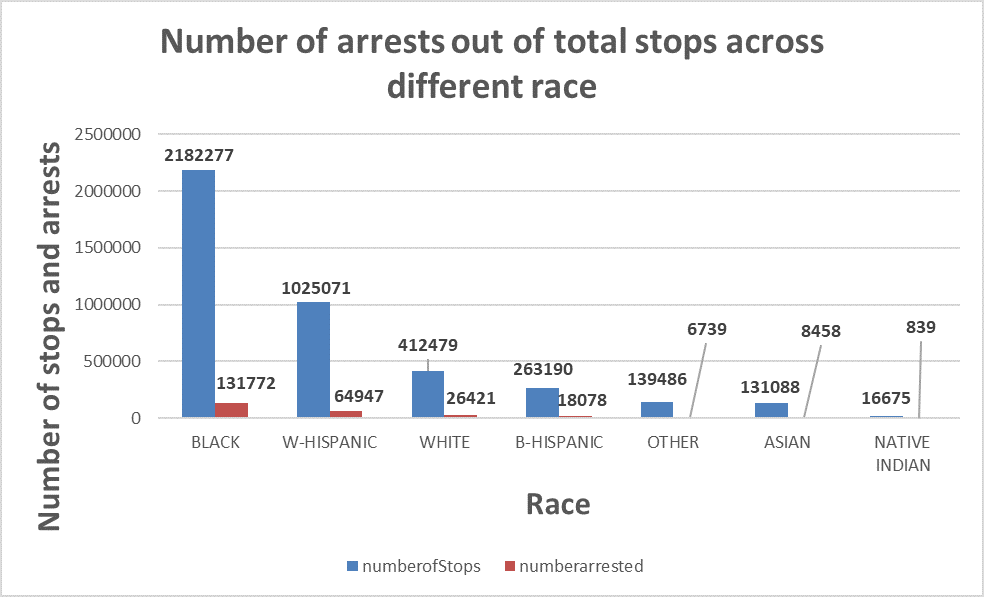

In [910]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/1.png')

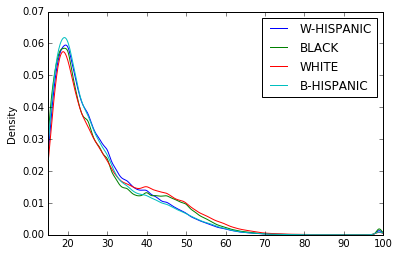

In [892]:
#Stop Frequency by Race and Age
#df_race_new = df_all[df_all.age != " "]df_all
array = ['BLACK', 'W-HISPANIC','WHITE','B-HISPANIC']
df_race_new = df_all.loc[df_all['race'].isin(array)]
                
fig, ax = plt.subplots()
ax.set_xlim(15, 100)
for race in df_race_new['race'].unique():
    s = df_race_new[df_race_new['race'] == race]['age']
    s.plot.kde(ax=ax, label=race)
ax.legend()

In [893]:
#Question 6: Number of stops and arrests based on people carrying any kind of weapon. 
raceFrequency1 = pd.DataFrame(df_all['race'].value_counts())
raceFrequency1.reset_index(inplace=True)
raceFrequency1.columns = ['race','numberofStops']
raceFrequencyfinal1 = pd.DataFrame(data=None, columns=['race','numberofStops','numberarrested'])


for i in range(0,len(raceFrequency1)):
    numberarrested = df_all[(df_all['race'] == raceFrequency1.iloc[i,0]) & ((df_all['pistol'] == 'Y') |  (df_all['riflshot'] == 'Y') | (df_all['asltweap'] == 'Y') | (df_all['machgun'] == 'Y') | (df_all['othrweap'] == 'Y'))]
    raceFrequencyfinal1 = raceFrequencyfinal1.append({'race':raceFrequency1.iloc[i,0],'numberofStops': raceFrequency1.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
raceFrequencyfinal1['percentageofStops'] = 100 * raceFrequencyfinal1['numberofStops']/raceFrequencyfinal1['numberofStops'].sum()
raceFrequencyfinal1['percentageofArrest'] = 100 * raceFrequencyfinal1['numberarrested']/raceFrequencyfinal1['numberofStops'].sum()

raceFrequencyfinal1

,race,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,BLACK,2182277,8944,52.3294,0.214471
1,W-HISPANIC,1025071,3972,24.5805,0.0952457
2,WHITE,412479,1722,9.89095,0.0412923
3,B-HISPANIC,263190,1132,6.31111,0.0271446
4,OTHER,139486,373,3.34477,0.00894427
5,ASIAN,131088,497,3.1434,0.0119177
6,NATIVE INDIAN,16675,54,0.399855,0.00129488


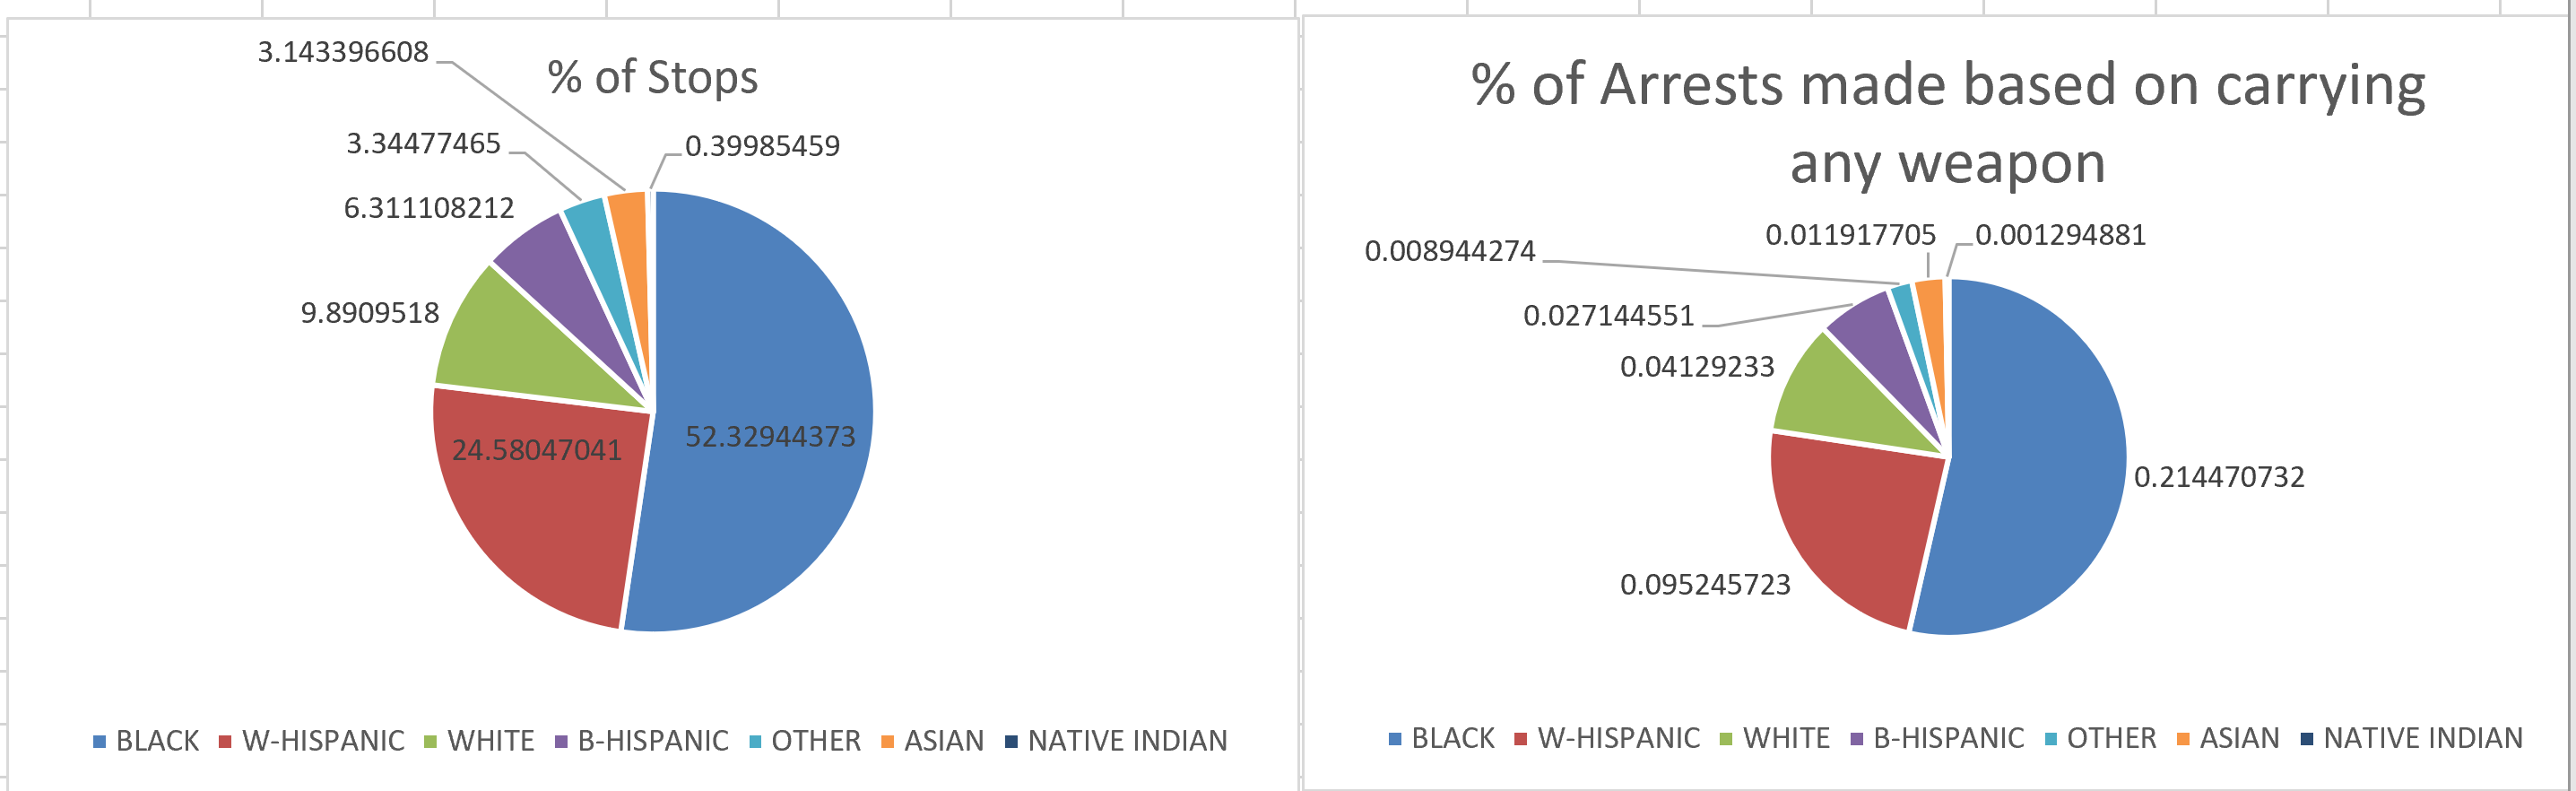

In [911]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/2.png')

In [896]:
#Question 7
### No. of stops and arrests made based on build

buildFrequency = pd.DataFrame(df_all['build'].value_counts())
buildFrequency.reset_index(inplace=True)
buildFrequency.columns = ['build','numberofStops']
buildFrequencyfinal = pd.DataFrame(data=None, columns=['build','numberofStops','numberarrested'])


for i in range(0,len(buildFrequency)):
    numberarrested = df_all[(df_all['build'] == buildFrequency.iloc[i,0]) & (df_all['arstmade'] == 'Y')]
    buildFrequencyfinal = buildFrequencyfinal.append({'build':buildFrequency.iloc[i,0],'numberofStops': buildFrequency.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
buildFrequencyfinal['percentageofStops'] = 100 * buildFrequencyfinal['numberofStops']/buildFrequencyfinal['numberofStops'].sum()
buildFrequencyfinal['percentageofArrest'] = 100 * buildFrequencyfinal['numberarrested']/buildFrequencyfinal['numberofStops'].sum()

buildFrequencyfinal

,build,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,MEDIUM,2462003,141386,59.0371,3.39034
1,THIN,1299193,85710,31.1537,2.05526
2,HEAVY,346875,26285,8.31781,0.630296
3,UNKNOWN,46327,2549,1.11089,0.0611232
4,MUSCULAR,15868,1324,0.380503,0.0317486


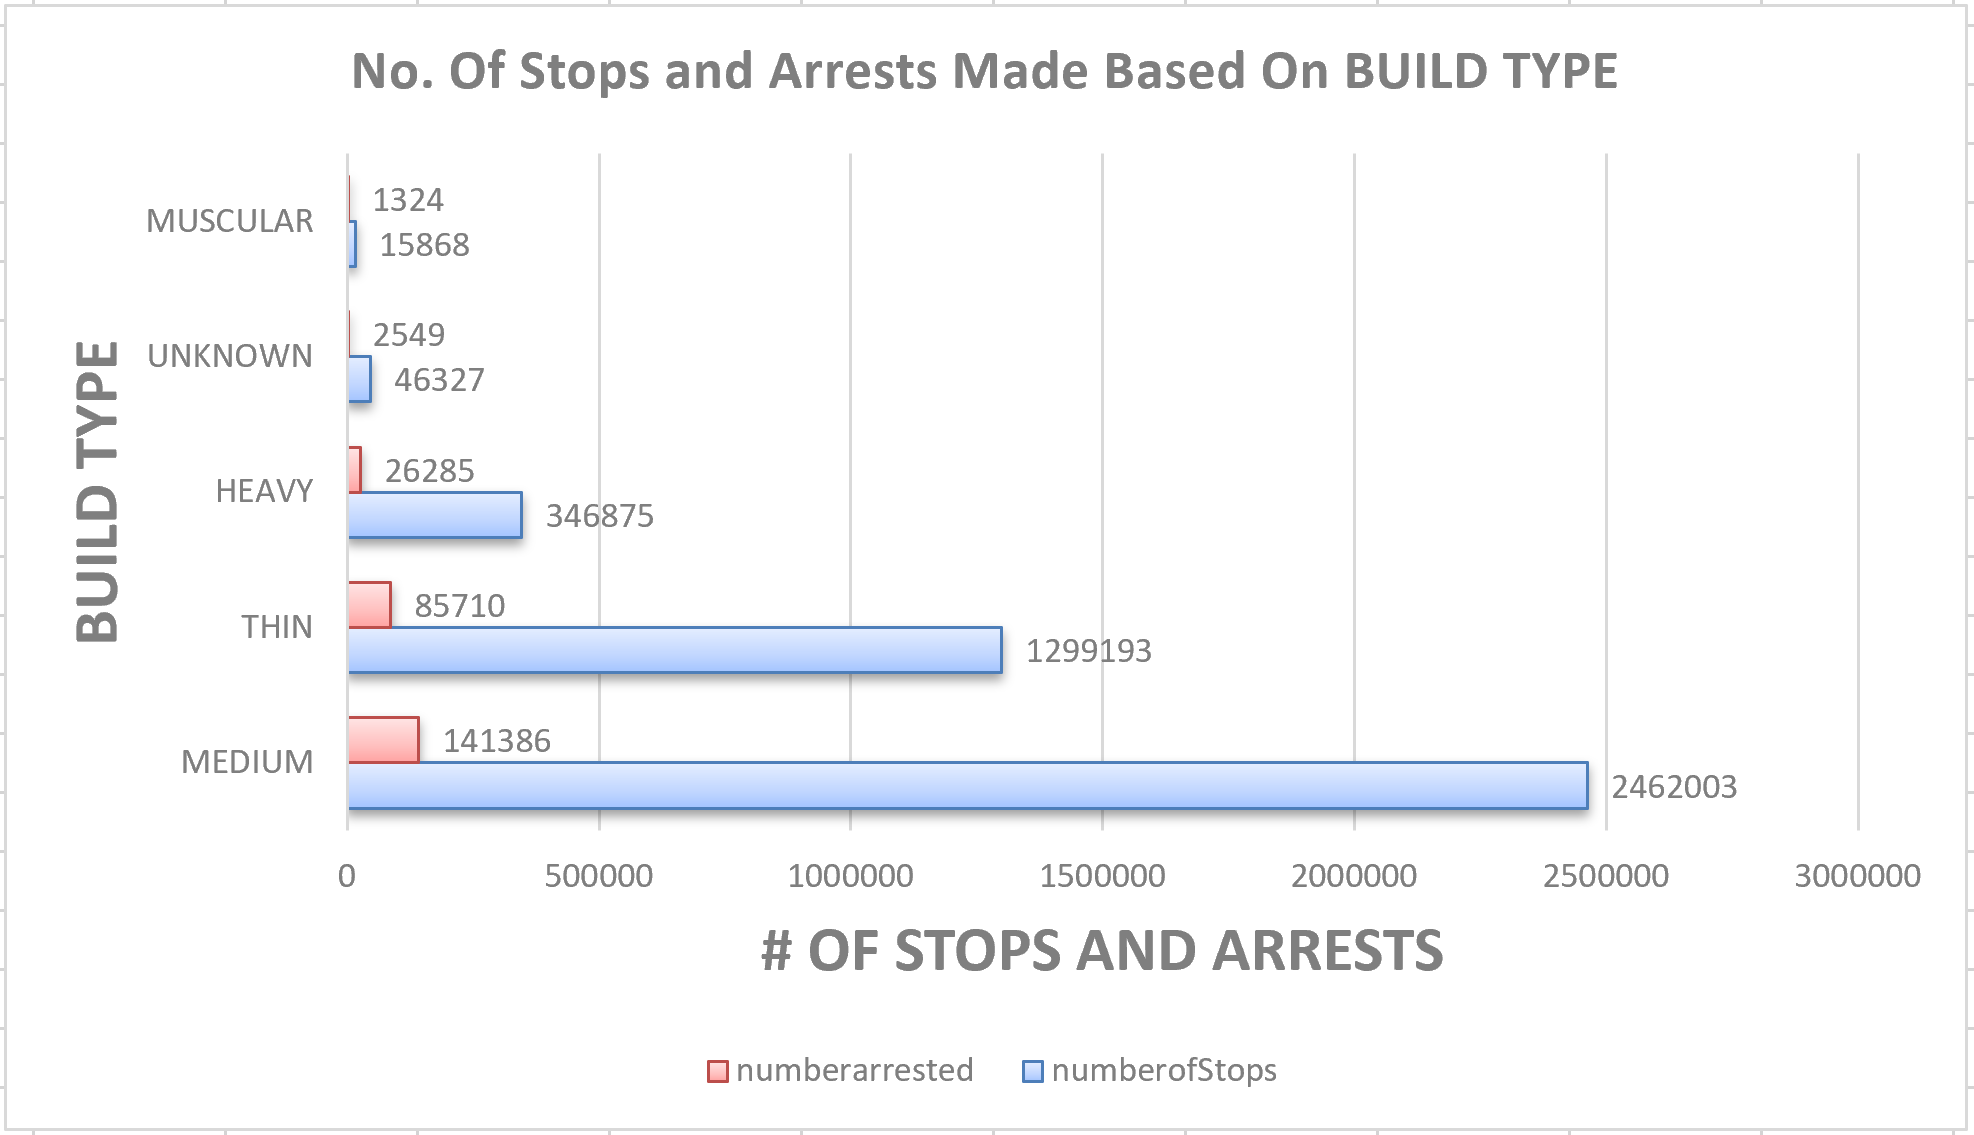

In [913]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/3.png')

In [897]:
### No. of stops and arrest made based on haircolor

haircolorFrequency = pd.DataFrame(df_all['haircolr'].value_counts())
haircolorFrequency.reset_index(inplace=True)
haircolorFrequency.columns = ['haircolr','numberofStops']
#print(raceFrequency)

haircolorFrequencyfinal = pd.DataFrame(data=None, columns=['haircolr','numberofStops','numberarrested'])


for i in range(0,len(haircolorFrequency)):
    numberarrested = df_all[(df_all['haircolr'] == haircolorFrequency.iloc[i,0]) & (df_all['arstmade'] == 'Y')]
    haircolorFrequencyfinal = haircolorFrequencyfinal.append({'haircolr':haircolorFrequency.iloc[i,0],'numberofStops': haircolorFrequency.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
haircolorFrequencyfinal['percentageofStops'] = 100 * haircolorFrequencyfinal['numberofStops']/haircolorFrequencyfinal['numberofStops'].sum()
haircolorFrequencyfinal['percentageofArrest'] = 100 * haircolorFrequencyfinal['numberarrested']/haircolorFrequencyfinal['numberofStops'].sum()

haircolorFrequencyfinal

,haircolr,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,BLACK,3113154,185460,74.6512,4.4472
1,BROWN,828265,51858,19.8612,1.24352
2,BALD,66541,7606,1.59561,0.182386
3,BLOND,51694,3886,1.23959,0.0931835
4,OTHER,45256,2081,1.08521,0.0499009
5,GRAY,38355,2653,0.919726,0.063617
6,SALT AND PEPPER,18833,2792,0.451602,0.0669502
7,RA,4241,579,0.101696,0.013884
8,RED,1321,115,0.0316766,0.00275762
9,WHITE,1180,34,0.0282956,0.000815296


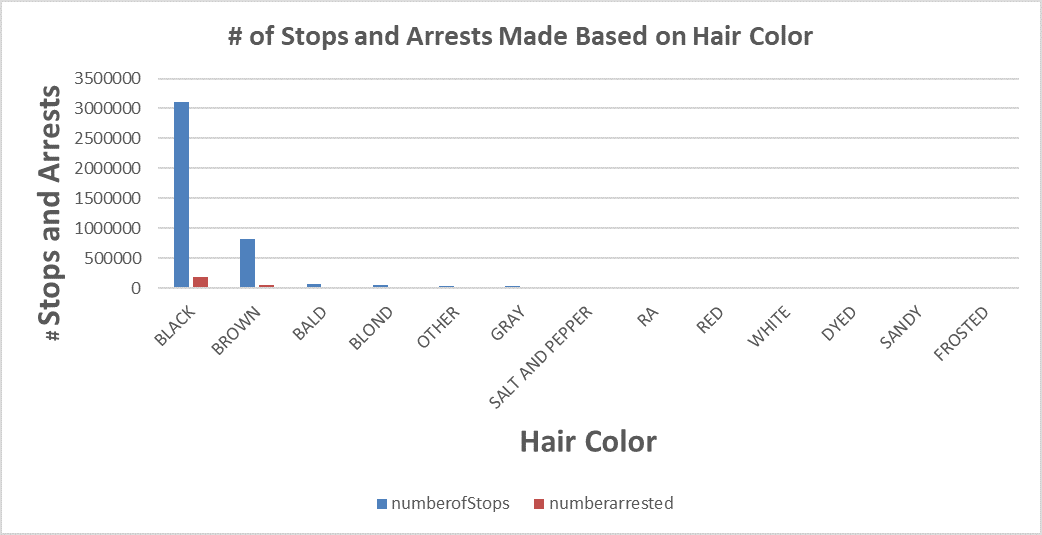

In [914]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/4.png')

In [898]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('D:/DataCollectionCleaning/Final/data_final3.xlsx', engine='xlsxwriter')
raceFrequencyfinal.to_excel(writer, sheet_name='Sheet1')
raceFrequencyfinal1.to_excel(writer, sheet_name='Sheet2')
buildFrequencyfinal.to_excel(writer, sheet_name='Sheet3')
haircolorFrequencyfinal.to_excel(writer, sheet_name='Sheet4')
writer.save()

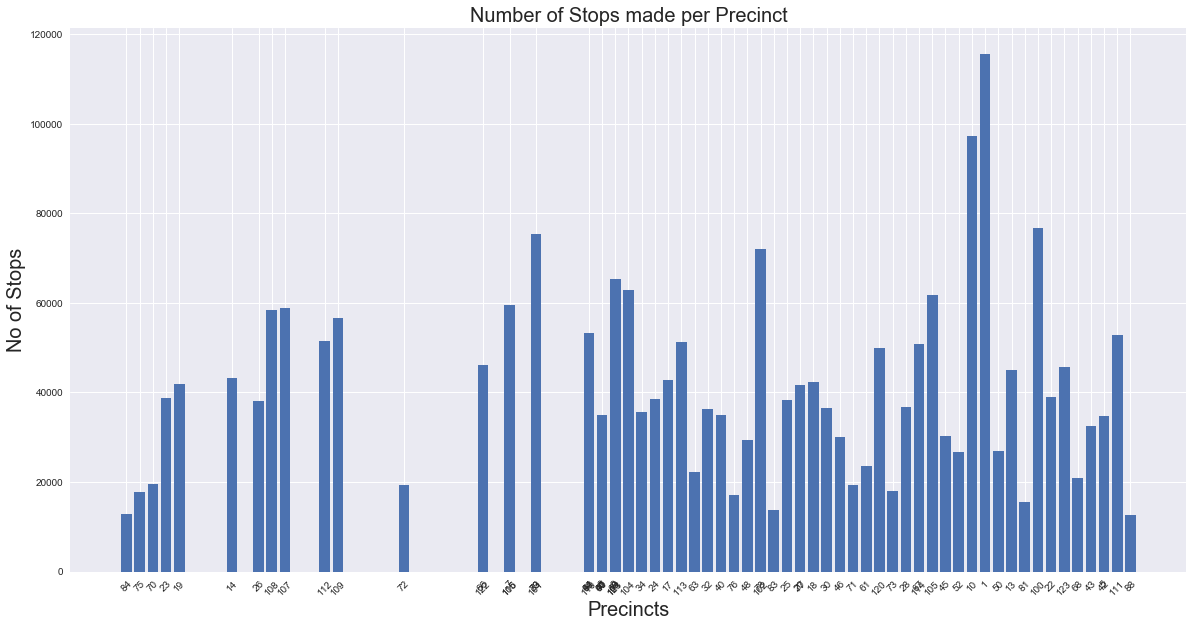

In [69]:
#question 8
# Number of Stops made per precinct
df_perprecinct = pd.DataFrame(df_all.groupby(['pct'])['year'].count())
df_perprecinct = df_perprecinct.sort_values('year', ascending=False).reset_index()
df_perprecinct['pct'] = df_perprecinct['pct'].astype(str)
plt.figure(figsize=(20,10))
plt.bar(x = df_perprecinct['pct'], height =df_perprecinct['year'] )
plt.xlabel('Precincts', fontsize=20)
plt.ylabel('No of Stops', fontsize=20)
plt.xticks(df_perprecinct['pct'], fontsize=10, rotation=45)
plt.title('Number of Stops made per Precinct', fontsize= 20)
plt.show()
plt.savefig('NumberofStopsPerPrecinct')

In [900]:
df_crime = df_all[df_all['crimsusp'].str.contains('DRUG')]
df_crime

,ac_incid,age,arstmade,asltweap,build,crimsusp,cs_cloth,cs_descr,cs_drgtr,cs_objcs,...,rf_othsw,rf_vcact,rf_vcrim,riflshot,searched,ser_num,sex,timestop,typeofid,year
1718,N,46.0,N,N,HEAVY,DRUG SALES,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,1335.0,V,0 2003\n1 2003\n2 2003\n3...
1719,N,37.0,N,N,MEDIUM,DRUG SALES,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,1335.0,P,0 2003\n1 2003\n2 2003\n3...
1720,N,39.0,N,N,MEDIUM,DRUG SALES,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,1335.0,V,0 2003\n1 2003\n2 2003\n3...
2536,Y,38.0,N,N,MEDIUM,CPW/DRUG TRANSACTION,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Other,2035.0,V,0 2003\n1 2003\n2 2003\n3...
2537,Y,25.0,N,N,MEDIUM,DRUG SALES,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2130.0,P,0 2003\n1 2003\n2 2003\n3...
2538,Y,24.0,N,N,THIN,DRUG SALES,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2130.0,P,0 2003\n1 2003\n2 2003\n3...
2539,N,25.0,N,N,THIN,CPW/DRUG SALE,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2130.0,V,0 2003\n1 2003\n2 2003\n3...
2576,N,43.0,N,N,THIN,DRUG SALE,N,N,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2240.0,P,0 2003\n1 2003\n2 2003\n3...
2803,Y,20.0,N,N,THIN,DRUG SALES CSCS,N,Y,Y,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2005.0,P,0 2003\n1 2003\n2 2003\n3...
2951,Y,20.0,N,N,THIN,DRUG SALE,N,N,N,N,...,N,N,N,N,N,0 5\n1 3\n2 1...,Male,2300.0,P,0 2003\n1 2003\n2 2003\n3...


In [901]:
#question 9
df_crime = df_all[df_all['crimsusp'].str.contains('DRUG')]

crimeFrequency = pd.DataFrame(df_crime['race'].value_counts())
crimeFrequency.reset_index(inplace=True)
crimeFrequency.columns = ['race','numberofStops']
crimeFrequencyfinal = pd.DataFrame(data=None, columns=['race','numberofStops','numberarrested'])


for i in range(0,len(crimeFrequency)):
    numberarrested = df_crime[(df_crime['race'] == crimeFrequency.iloc[i,0]) & (df_crime['arstmade'] == 'Y')]
    crimeFrequencyfinal = crimeFrequencyfinal.append({'race':crimeFrequency.iloc[i,0],'numberofStops': crimeFrequency.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
crimeFrequencyfinal['percentageofStops'] = 100 * crimeFrequencyfinal['numberofStops']/crimeFrequencyfinal['numberofStops'].sum()
crimeFrequencyfinal['percentageofArrest'] = 100 * crimeFrequencyfinal['numberarrested']/crimeFrequencyfinal['numberofStops'].sum()

crimeFrequencyfinal

,race,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,BLACK,5145,219,45.9375,1.95536
1,W-HISPANIC,2908,86,25.9643,0.767857
2,WHITE,1072,61,9.57143,0.544643
3,B-HISPANIC,1015,27,9.0625,0.241071
4,OTHER,834,7,7.44643,0.0625
5,ASIAN,191,10,1.70536,0.0892857
6,NATIVE INDIAN,35,4,0.3125,0.0357143


In [589]:
#question 9
df_crime = df_all[df_all['crimsusp'].str.contains('DRUG')]

crimeFrequency1 = pd.DataFrame(df_crime['sex'].value_counts())
crimeFrequency1.reset_index(inplace=True)
crimeFrequency1.columns = ['sex','numberofStops']
crimeFrequencyfinal1 = pd.DataFrame(data=None, columns=['sex','numberofStops','numberarrested'])


for i in range(0,len(crimeFrequency1)):
    numberarrested = df_crime[(df_crime['sex'] == crimeFrequency1.iloc[i,0]) & (df_crime['arstmade'] == 'Y')]
    crimeFrequencyfinal1 = crimeFrequencyfinal1.append({'sex':crimeFrequency1.iloc[i,0],'numberofStops': crimeFrequency1.iloc[i,1], 'numberarrested': numberarrested['arstmade'].size}, ignore_index=True)
    
crimeFrequencyfinal1['percentageofStops'] = 100 * crimeFrequencyfinal1['numberofStops']/crimeFrequencyfinal1['numberofStops'].sum()
crimeFrequencyfinal1['percentageofArrest'] = 100 * crimeFrequencyfinal1['numberarrested']/crimeFrequencyfinal1['numberofStops'].sum()

crimeFrequencyfinal1

,sex,numberofStops,numberarrested,percentageofStops,percentageofArrest
0,Male,2622,84,87.9571,2.81785
1,Female,226,4,7.58135,0.134183
2,Other,133,7,4.46159,0.234821


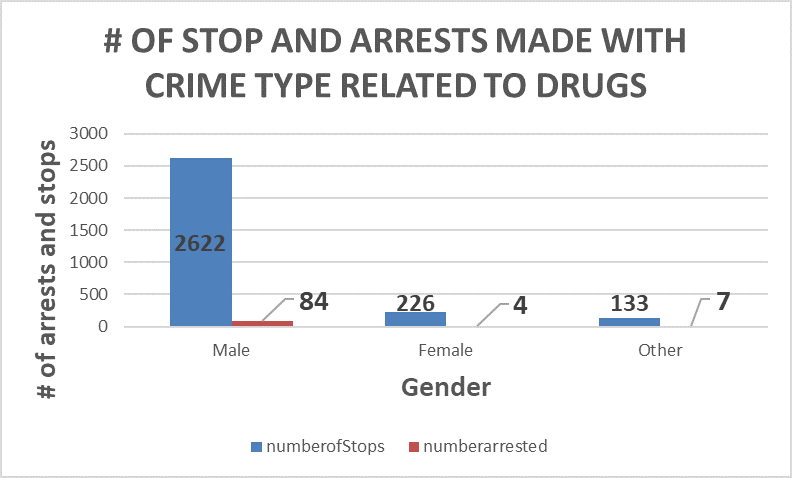

In [916]:
from IPython.display import Image
Image('D:/Mohini/DataCollectionCleaning/Final/5.png')

In [902]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('D:/Mohini/DataCollectionCleaning/Final/drug_crime.xlsx', engine='xlsxwriter')
crimeFrequencyfinal.to_excel(writer, sheet_name='Sheet1')
crimeFrequencyfinal1.to_excel(writer, sheet_name='Sheet2')
writer.save()

In [903]:
#Question 10
#out of total stops ,no. of incidents that are from area with high crime rate
high_crime_incidence = df_all['ac_incid'].value_counts()[1]
high_crime_incidence

1805841

In [904]:
#question 11
violent_crime_suspect = df_all['rf_vcrim'].value_counts()[1]
violent_crime_suspect

494104

In [905]:
#question 13
#Create new column to represent whether the suspect is black
df_all['is_black'] = df_all['race'] == 'BLACK'
# Keeping premise name with specific premises
df_all_filtered = df_all[df_all['premname'].isin(['STREET', 'SIDEWALK','HOUSE','CAR'])]
df_all_filtered.groupby(['is_black','premname']).apply(outcome_stats_computation)

arrest_rate  frisked_rate  searched_rate  total_arrests  \
is_black premname                                                            
False    CAR          0.102269      0.562850       0.140264          969.0   
         HOUSE        0.101757      0.395481       0.107280          608.0   
         SIDEWALK     0.056960      0.633481       0.093771        14824.0   
         STREET       0.054012      0.547261       0.084573        45422.0   
True     CAR          0.123628      0.578736       0.145727          800.0   
         HOUSE        0.141035      0.473618       0.138285          564.0   
         SIDEWALK     0.050943      0.668734       0.086763        16742.0   
         STREET       0.053173      0.611888       0.084428        40405.0   

                   total_frisked  total_searched  total_stops  
is_black premname                                              
False    CAR              5333.0          1329.0       9475.0  
         HOUSE            2363.0           641.0       5975.0  
         SIDEWALK       164864.0         24404.0     260251.0  
         STREET         460228.0         71123.0     840966.0  
True     CAR              3745.0           943.0       6471.0  
         HOUSE            1894.0           553.0       3999.0  
         SIDEWALK       219774.0         28514.0     328642.0  
         STREET         464959.0         64155.0     759876.0

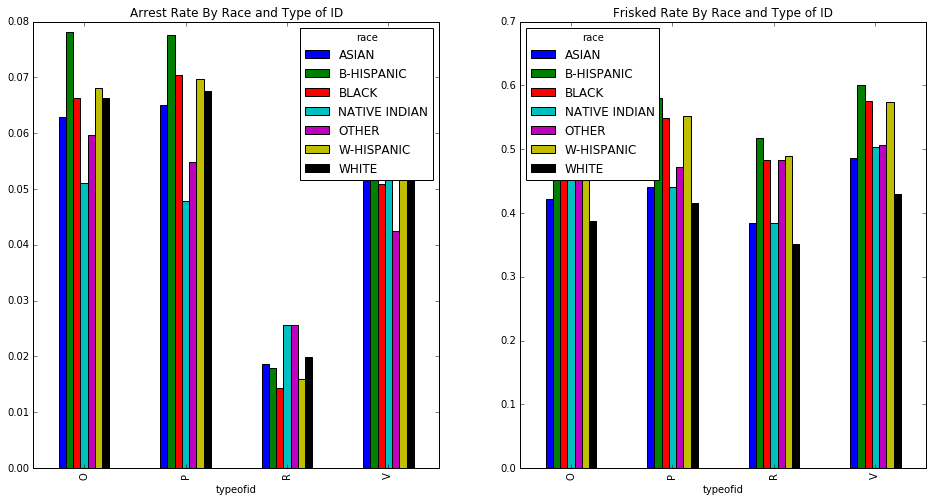

In [906]:
#Visualizing Type of Id and Race Results
race_stats = df_all.groupby(['typeofid', 'race']).apply(outcome_stats_computation).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
race_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrest Rate By Race and Type of ID')
race_stats.plot.bar(y='frisked_rate', ax=axes[1], title='Frisked Rate By Race and Type of ID')

In [907]:
#Comparing Search Stats By Age
#We have split the dataset into age buckets and performed the analysis.
age_groups = pd.cut(df_all["age"], np.arange(10, 100, 5))
age_agg = df_all.groupby(age_groups).apply(outcome_stats_computation)
age_agg

,arrest_rate,frisked_rate,searched_rate,total_arrests,total_frisked,total_searched,total_stops
age,,,,,,,
"(10, 15]",0.049769,0.577894,0.077489,9968.0,115744.0,15520.0,200286.0
"(15, 20]",0.057538,0.601025,0.088189,66124.0,690716.0,101350.0,1149230.0
"(20, 25]",0.057233,0.581813,0.087950,50681.0,515205.0,77881.0,885517.0
"(25, 30]",0.057075,0.547427,0.085869,33674.0,322982.0,50663.0,590000.0
"(30, 35]",0.063384,0.517046,0.088350,23009.0,187693.0,32072.0,363010.0
"(35, 40]",0.068419,0.469777,0.088223,19237.0,132084.0,24805.0,281163.0
"(40, 45]",0.080819,0.449556,0.093348,20216.0,112451.0,23350.0,250138.0
"(45, 50]",0.083228,0.424953,0.092504,17039.0,86999.0,18938.0,204726.0
"(50, 55]",0.080782,0.398868,0.088294,10109.0,49914.0,11049.0,125139.0


In [918]:
# Create traces
# Create and style traces
# trace0 = go.Scatter(
#     x = age_agg['arrest_rate'],
#     y = age_agg['age'],
#     name = 'Arrest Rate',
#     line = dict(
#         color = ('rgb(205, 12, 24)'),
#         width = 4)
# )
# trace1 = go.Scatter(
#     x = age_agg['frisk_rate'],
#     y = age_agg['age'],
#     name = 'Frisked rate',
#     line = dict(
#         color = ('rgb(22, 96, 167)'),
#         width = 4,)
# )

# data = [trace0, trace1]
# # Edit the layout
# layout = dict(title = 'Arrest rate and Frsik Rate',
#               xaxis = dict(title = 'Rate'),
#               yaxis = dict(title = 'Age'),
#               )

# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='styled-line')

In [919]:
# No. of suspects handcuffed after arrest was made
df_arrest = df_all[df_all['arstmade']== 'Y']
handcuff = df_arrest['pf_hcuff'].value_counts()[1]
handcuff

91260

In [926]:
#question 15
refused_id = df_all[ (df_all['typeofid']=='R') & (df_all['arstmade']=='Y')]
len(refused_id)

1282